In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)

In [17]:
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [18]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

In [19]:
data.columns = header

In [20]:
data.index = [1,2,3,4,5,6,7,8,9,10,11]

In [21]:
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1        10.0   8.04      10.0  9.14      10.0   7.46       8.0   6.58
2         8.0   6.95       8.0  8.14       8.0   6.77       8.0   5.76
3        13.0   7.58      13.0  8.74      13.0  12.74       8.0   7.71
4         9.0   8.81       9.0  8.77       9.0   7.11       8.0   8.84
5        11.0   8.33      11.0  9.26      11.0   7.81       8.0   8.47
6        14.0   9.96      14.0  8.10      14.0   8.84       8.0   7.04
7         6.0   7.24       6.0  6.13       6.0   6.08       8.0   5.25
8         4.0   4.26       4.0  3.10       4.0   5.39      19.0  12.50
9        12.0  10.84      12.0  9.13      12.0   8.15       8.0   5.56
10        7.0   4.82       7.0  7.26       7.0   6.42       8.0   7.91
11        5.0   5.68       5.0  4.74       5.0   5.73       8.0   6.89

In [22]:
#data.to_latex('hola.tex')

In [23]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


<AxesSubplot:xlabel='$x_4$', ylabel='$y_4$'>

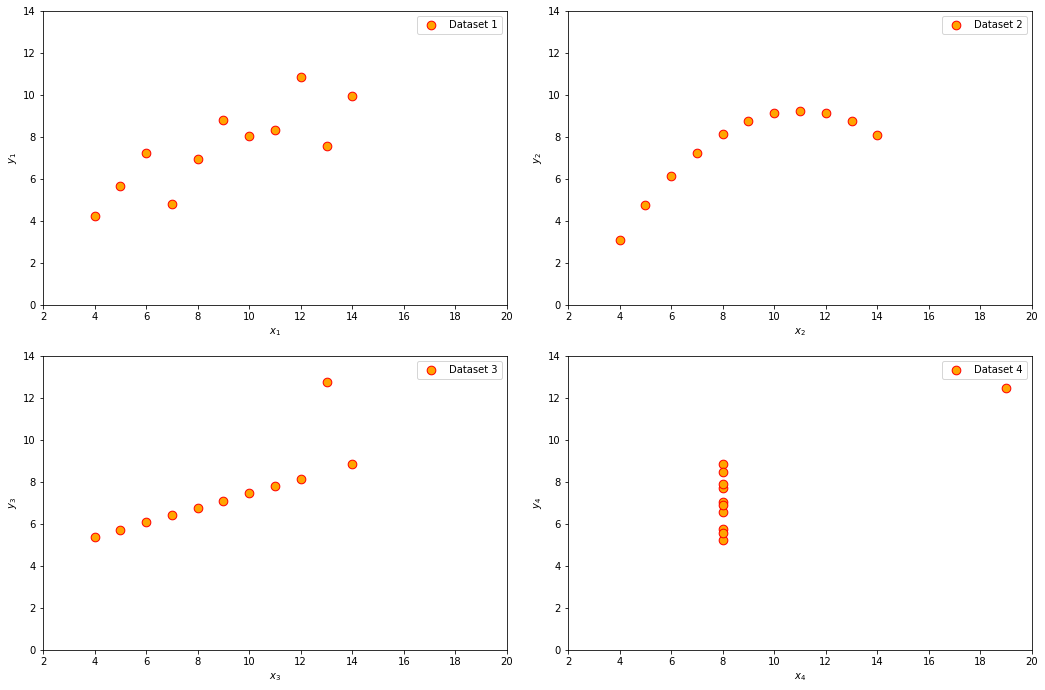

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(pad=3.0)

parametros = {'marker':'o', 'c':'orange', 'edgecolor':'red', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros)
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros)
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros)
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred

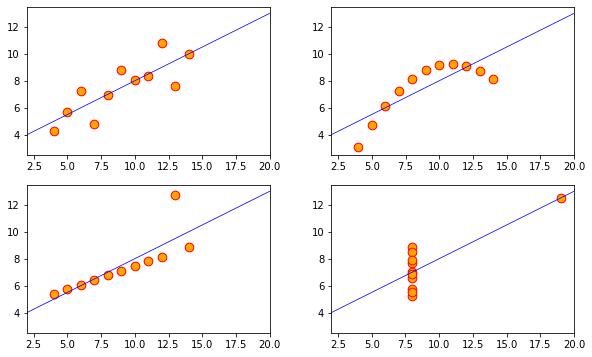

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

i = 0
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        i += 2